# National Newspaper Data Collection and Cleaning

Purpose of this notebook is to gather and clean the national newspaper data. We start out with the publicly accessible data set "All the News 2.0". The data set is created by Andrew Thompson and available to download from [Components (download via ProtonDrive)](https://components.one/datasets/all-the-news-2-news-articles-dataset).

## Gathering and Preprocessing National Newspaper Datasets

Outline: 
- Download data set
- Filter for relevant newspaper (publication column). Here: "The New York Times".
- Explore the filtered data
- Save the new data set in the GitHub repo or as a gist, or a sample of the data, depending on its size. 

In [4]:
# …existing cells…

# VSCode/Jupyter will show you the cwd & files in it:
import os
print("CWD:", os.getcwd())
print("Contents:")
print(os.listdir(os.getcwd()))

CWD: c:\MarxerB\Dropbox\_Kurse\DSPP ETHZ 2025\project-ds4pp-eth2025\data
Contents:
['.gitkeep', 'all-the-news-2-1.csv', 'national-news.ipynb']


In [5]:
# Read in and filter the data

# name (=path): all-the-news-2-1.csv
# appraoch: use DuckDB + SQL push-down to filter the data for outlets (publication column) of our choice. This way we never load the entire dataset into memory.

import duckdb

csv_path    = "all-the-news-2-1.csv"

# DuckDB will only scan rows matching your WHERE clause
df_nyt = duckdb.query(f"""
    SELECT *
      FROM read_csv_auto('{csv_path}')
     WHERE publication='The New York Times'
""").to_df()

df_nyt.head()



,date,year,month,day,author,title,article,url,section,publication
0,2019-01-14 13:38:12,2019,1.0,14,None,Sailors Unite Against Harbinger Capital-Backed...,None,http://dealbook.nytimes.com/2011/07/13/boaters...,boaters-concerned-over-falcones-lightsquared,The New York Times
1,2019-01-14 13:14:59,2019,1.0,14,None,How Much Did Warren Buffett Pay For BofA Anywa...,None,http://dealbook.nytimes.com/2011/08/25/how-big...,how-big-was-buffetts-discount,The New York Times
2,2019-08-21 15:45:00,2019,8.0,21,None,SEC.gov | HOME,EDGAR \nCompany Filings - Free access to 21 mi...,http://dealbook.nytimes.com/2011/08/23/in-wake...,in-wake-of-quake-s-e-c-suspends-edgar-system,The New York Times
3,2019-08-05 13:20:28,2019,8.0,5,None,Reviews - The Verge,None,http://dealbook.nytimes.com/2011/08/31/t-mobil...,t-mobile-chief-admits-he-was-surprised-by-just...,The New York Times
4,2019-08-23 10:00:46,2019,8.0,23,None,Home - Motor Expo,None,http://wheels.blogs.nytimes.com/2011/09/16/new...,new-york-motorexpo-returns-to-lower-manhattan-...,The New York Times


In [6]:
# Compute df_nyt size in MB
memory_bytes = df_nyt.memory_usage(deep=True).sum()
memory_mb    = memory_bytes / (1024 ** 2)
print(f"df_nyt size: {memory_mb:.2f} MB")

df_nyt size: 2734.58 MB


In [11]:
# Random sample of 10'000 rows
df_nyt_sample = df_nyt.sample(n=10000, random_state=42)

# new column url_short which is the url but only the domain and potential subdomain, as well as the top-level domain.
# e.g. https://www.nytimes.com/2023/10/01/us/politics/trump-2024.html
# becomes www.nytimes.com
df_nyt_sample['url_short'] = df_nyt_sample['url'].str.extract(r'^(?:https?://)?(?:www\.)?([^/]+)')[0]

# Check the new column
df_nyt_sample['url_short'].head()
# Check the number of unique values
df_nyt_sample['url_short'].nunique()
# Check the number of unique values
df_nyt_sample['url_short'].value_counts()

url_short
nytimes.com                            9818
cn.nytimes.com                           39
lens.blogs.nytimes.com                   23
cn.nytstyle.com                          18
well.blogs.nytimes.com                   16
learning.blogs.nytimes.com               15
artsbeat.blogs.nytimes.com               14
iht-retrospective.blogs.nytimes.com      12
wordplay.blogs.nytimes.com               10
takingnote.blogs.nytimes.com              7
krugman.blogs.nytimes.com                 7
bits.blogs.nytimes.com                    6
news.blogs.nytimes.com                    6
dotearth.blogs.nytimes.com                5
kristof.blogs.nytimes.com                 2
douthat.blogs.nytimes.com                 1
parenting.blogs.nytimes.com               1
Name: count, dtype: int64

In [13]:
# Average number of words in the title
df_nyt_sample['title'].str.split().str.len().mean()

np.float64(9.07204322593556)

In [14]:
# Average number of words in the article
df_nyt_sample['article'].str.split().str.len().mean()

np.float64(920.7693321171582)

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 60.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 31.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 25.7 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pill

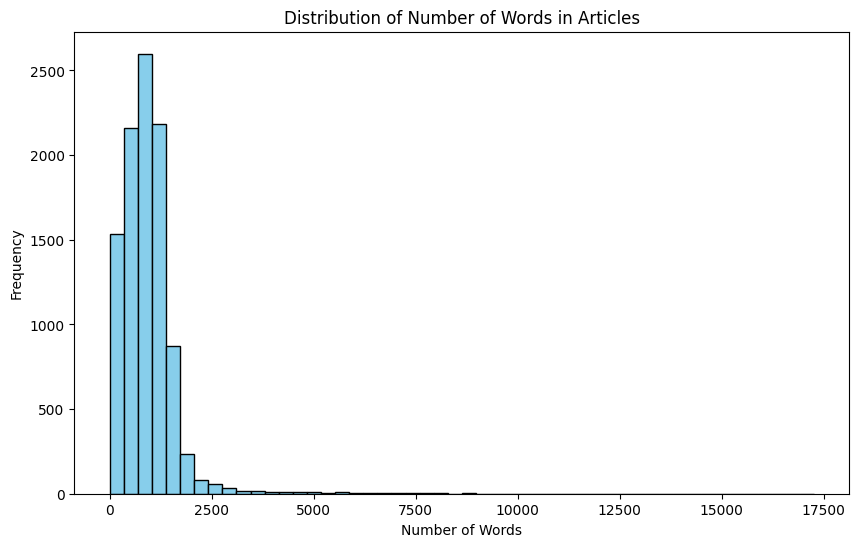

In [ ]:
# Distribution of the number of words in the article
import matplotlib.pyplot as plt

word_counts = df_nyt_sample['article'].dropna().str.split().str.len()
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Words in Articles')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Note: you may need to restart the kernel to use updated packages.
Top terms per topic:
Topic 1: new, like, book, music, time, work, life, film, world, story
Topic 2: like, people, said, just, time, don, know, new, make, day
Topic 3: trump, said, president, house, news, white, investigation, did, times, new
Topic 4: said, united, china, american, states, war, military, government, president, state
Topic 5: game, team, said, season, que, players, games, los, year, league
Topic 6: said, government, court, people, country, states, united, law, state, rights
Topic 7: trump, said, president, republican, party, campaign, democratic, people, democrats, state
Topic 8: said, police, school, new, city, york, university, year, people, father
Topic 9: said, company, percent, new, year, companies, million, billion, money, business
Topic 10: said, new, city, york, art, like, street, year, museum, home


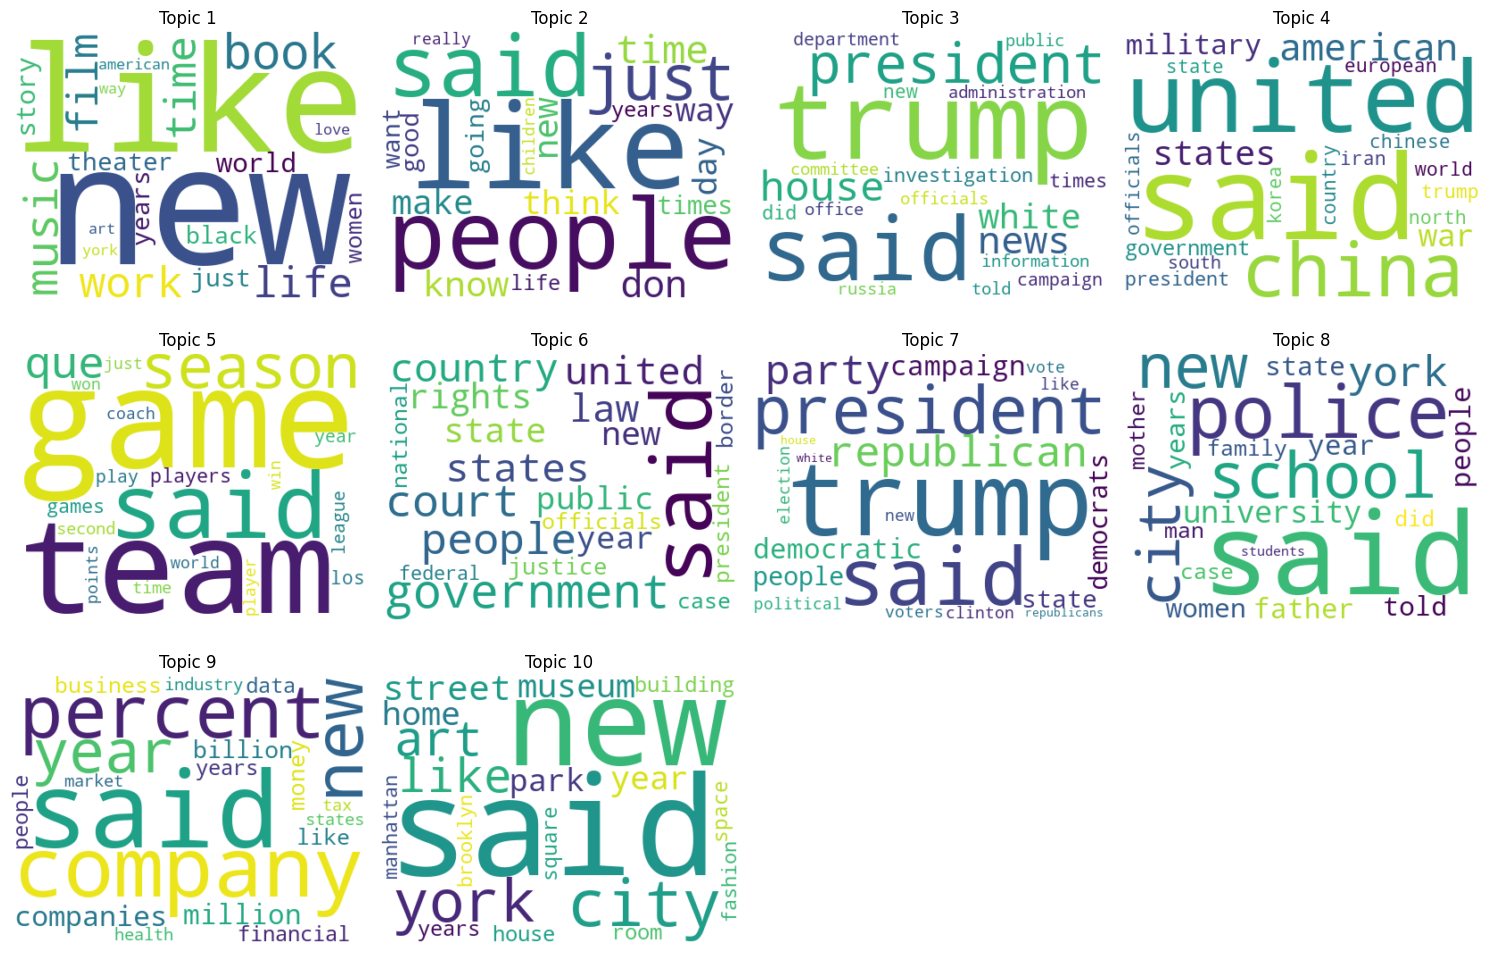

In [23]:
# VSCode.Cell id="topic_modeling_wordcloud" language="python"
# --- Topic Modeling + WordCloud Visualization (no NLTK) ---

# 0) install deps
%pip install --quiet scikit-learn wordcloud matplotlib

# 1) imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 2) prepare corpus
texts = df_nyt_sample['article'].fillna('').tolist()

# 3) vectorize using built-in English stop words
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=10,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)
dtm = vectorizer.fit_transform(texts)

# 4) fit LDA
n_topics = 10
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=20,
    learning_method='batch',
    random_state=42
)
lda.fit(dtm)

# 5) display top terms per topic
feature_names = vectorizer.get_feature_names_out()
def display_topics(model, feature_names, top_n=10):
    for i, comp in enumerate(model.components_):
        terms = [feature_names[j] for j in comp.argsort()[-top_n:][::-1]]
        print(f"Topic {i+1}: {', '.join(terms)}")
print("Top terms per topic:")
display_topics(lda, feature_names, top_n=10)

# 6) word-cloud visualization per topic
plt.figure(figsize=(15, 10))
for i, comp in enumerate(lda.components_):
    idx   = comp.argsort()[-20:]
    freqs = {feature_names[j]: comp[j] for j in idx}
    wc    = WordCloud(width=400, height=300,
                      background_color='white',
                      stopwords=STOPWORDS)\
               .generate_from_frequencies(freqs)
    plt.subplot(3, 4, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i+1}")
plt.tight_layout()
plt.show()

In [24]:
# Save the sample to a CSV file
df_nyt_sample.to_csv('df_nyt_sample.csv', index=False)